#  N - ARM Bandit Problem

---

This is to design a sequence of actions that will maximize the expected total reward over time

In [1]:
"""
 Doctor needs to select most effective treatment for each patient 
 Now he apply some treatment call them action
 - Even if he apply same treatment for the same patient results will be different
 - Result will be different for different people too
 - effectiveness will be measured by probability distribution
 - Numerical value is assigned to outcome
 - more positive => better reward
 - We will find reward mean or expected value of each action from distribution
 - Now select the action that gives highest reward
 
"""

'\n Doctor needs to select most effective treatment for each patient \n Now he apply some treatment call them action\n - Even if he apply same treatment for the same patient results will be different\n - Result will be different for different people too\n - effectiveness will be measured by probability distribution\n - Numerical value is assigned to outcome\n - more positive => better reward\n - We will find reward mean or expected value of each action from distribution\n - Now select the action that gives highest reward\n \n'

In [2]:
#However, we do not know in advance the values of action, consequently we will design algo that will learn the most appropriate action

### Exploitation step

In [3]:
#What we do is we select greedy approach, and we want to select the actions that maximize the past estimate of the action value


In [4]:
import numpy as np

class BanditProblem(object):
    # trueActionValues - means of the normal distributions used to generate random rewards
    # the number of arms is equal to the number of entries in the trueActionValues
    # epsilon - epsilon probability value for selecting non-greedy actions
    # totalSteps - number of total steps used to simulate the solution 
    
   
    
    def __init__(self,trueActionValues, epsilon, totalSteps):
        
        
        # number of arms
        self.armNumber=np.size(trueActionValues)
        
        # probability of ignoring the greedy selection and selecting 
        # an arm by random 
        self.epsilon=epsilon  
        
        #current step 
        self.currentStep=0
        
        #this variable tracks how many times a particular arm is being selected
        self.howManyTimesParticularArmIsSelected=np.zeros(self.armNumber)
        
        #total steps
        self.totalSteps=totalSteps
        
        # true action values that are expectations of rewards for arms
        self.trueActionValues=trueActionValues
        
        
        # vector that stores mean rewards of every arm
        self.armMeanRewards=np.zeros(self.armNumber)
        
        # variable that stores the current value of reward
        self.currentReward=0
        
        # mean reward 
        self.meanReward=np.zeros(totalSteps+1)
        
    # select actions according to the epsilon-greedy approach
    def selectActions(self):
        # draw a real number from the uniform distribution on [0,1]
        # this number is our probability of performing greedy actions
        # if this probability is larger than epsilon, we perform greedy actions
        # otherwise, we randomly select an arm 
        
        probabilityDraw=np.random.rand()
         
              
        # in the initial step, we select a random arm since all the mean rewards are zero
        # we also select a random arm if the probability is smaller than epsilon
        if (self.currentStep==0) or (probabilityDraw<=self.epsilon):
            selectedArmIndex=np.random.choice(self.armNumber)
                   
        # we select the arm that has the largest past mean reward
        if (probabilityDraw>self.epsilon):
            selectedArmIndex=np.argmax(self.armMeanRewards)
            
        # increase the step value
        
        self.currentStep=self.currentStep+1
        
        # take a record that the particular arm is selected 
        
        self.howManyTimesParticularArmIsSelected[selectedArmIndex]=self.howManyTimesParticularArmIsSelected[selectedArmIndex]+1
        
             
        # draw from the probability distribution of the selected arm the reward
        
        self.currentReward=np.random.normal(self.trueActionValues[selectedArmIndex],2)
        
        # update the estimate of the mean reward
        
        self.meanReward[self.currentStep]=self.meanReward[self.currentStep-1]+(1/(self.currentStep))*(self.currentReward-self.meanReward[self.currentStep-1])
        
        # update the estimate of the mean reward for the selected arm 
        
        self.armMeanRewards[selectedArmIndex]=self.armMeanRewards[selectedArmIndex]+(1/(self.howManyTimesParticularArmIsSelected[selectedArmIndex]))*(self.currentReward-self.armMeanRewards[selectedArmIndex])
    
    # run the simulation
    def playGame(self):
        for i in range(self.totalSteps):
            self.selectActions()
    
    # run the simulation with increments
    def playGame1(self):
        for i in range(self.totalSteps):
            self.selectActions()
            increments = np.random.normal(loc=0.0, scale=0.01, size=len(self.trueActionValues))
            self.trueActionValues += increments.tolist()
        
        
    # reset all the variables to the original state 
    def clearAll(self):
         #current step 
        self.currentStep=0
         #this variable tracks how many times a particular arm is being selected
        self.howManyTimesParticularArmIsSelected=np.zeros(self.armNumber)
        
         # vector that stores mean rewards of every arm
        self.armMeanRewards=np.zeros(self.armNumber)
        
        # variable that stores the current value of reward
        self.currentReward=0

         # mean reward 
        self.meanReward=np.zeros(self.totalSteps+1)

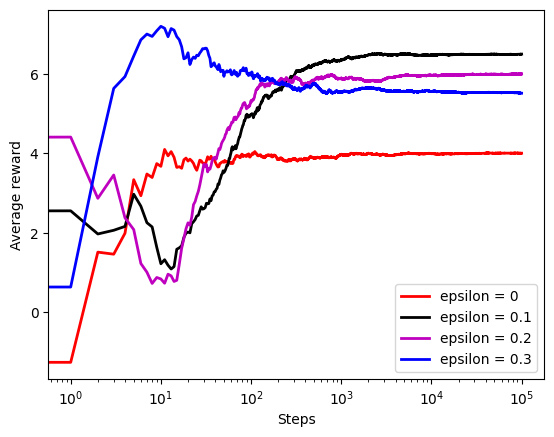

In [5]:
import matplotlib.pyplot as plt

# these are the means of the action values that are used to simulate the multi-armed bandit problem
# actionValues=np.array([1,4,2,0,7,1,-1])
actionValues=np.array([4.0 for i in range(10)])
# epsilon values to investigate the performance of the method
epsilon1=0
epsilon2=0.1
epsilon3=0.2
epsilon4=0.3

# total number of simulation steps 
totalSteps=100000

# create four different bandit problems and simulate the method performance
Bandit1=BanditProblem(actionValues, epsilon1, totalSteps)
Bandit1.playGame()
epsilon1MeanReward=Bandit1.meanReward
Bandit2=BanditProblem(actionValues, epsilon2, totalSteps)
Bandit2.playGame()
epsilon2MeanReward=Bandit2.meanReward
Bandit3=BanditProblem(actionValues, epsilon3, totalSteps)
Bandit3.playGame()
epsilon3MeanReward=Bandit3.meanReward
Bandit4=BanditProblem(actionValues, epsilon4, totalSteps)
Bandit4.playGame()
epsilon4MeanReward=Bandit4.meanReward

#plot the results
plt.plot(np.arange(totalSteps+1),epsilon1MeanReward,linewidth=2, color='r', label='epsilon = 0')
plt.plot(np.arange(totalSteps+1),epsilon2MeanReward,linewidth=2, color='k', label='epsilon = 0.1')
plt.plot(np.arange(totalSteps+1),epsilon3MeanReward,linewidth=2, color='m', label='epsilon = 0.2')
plt.plot(np.arange(totalSteps+1),epsilon4MeanReward,linewidth=2, color='b', label='epsilon = 0.3')
plt.xscale("log")
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.savefig('results2.png',dpi=300)
plt.show()